# EE/CS 228 HW#2 - Neural Network for MNIST

Submitted By: Vishnu Shukla

Student Identification Number: 862548226

Importing Required Libraries for the Assigment

In [108]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import math
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from numpy.ma.extras import unique
import time
import seaborn as sns



Loading the MNIST dataset and Previewing the samples

Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


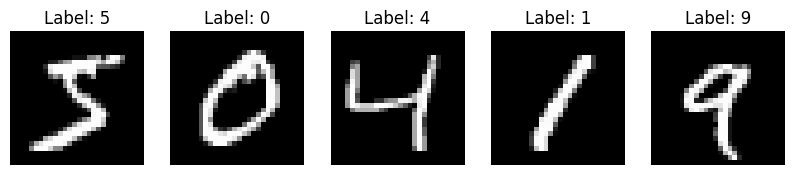

In [109]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training data shape:', x_train.shape, y_train.shape)
print('Test data shape:', x_test.shape, y_test.shape)

fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title('Label: ' + str(y_train[i]))
    axes[i].axis('off')
plt.show()

In [110]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

### Steps for Image Standardization and Bias Addition

1. **Standardize Images Using Z-Normalization**:

2. **Add Bias Variable**:
   - Append a constant bias term (1) to each standardized input vector, transforming the input as follows:
     \[
     x \rightarrow 
     \begin{bmatrix}
     x \\
     1
     \end{bmatrix}
   - This addition increases the input dimension to \( d = 785 \).


## `Task 1`. (2 pts) Apply the normalization on the training and test data.

In [111]:
def add_bias(data):
    
    normalized_data = (data - np.mean(data, axis=1, keepdims=True)) / (np.std(data, axis=1, keepdims=True) + 1e-8)
    return np.hstack((np.ones((normalized_data.shape[0], 1)), normalized_data))

x_train = add_bias(x_train)
x_test = add_bias(x_test)

print("Training data with bias addition:", x_train.shape)
print("Testing data with bias addition:", x_test.shape)

Training data with bias addition: (60000, 785)
Testing data with bias addition: (10000, 785)


### Output Conversion for Labels

Each label \( y \) represents a digit from 0 to 9. To convert these labels into binary classes (0 or 1), use the following rule:

\[
\begin{cases} 
0 & \text{if } 0 \leq y \leq 4 \\
1 & \text{if } 5 \leq y \leq 9 
\end{cases}
\]

This transformation maps labels from 0 to 4 to class 0 and labels from 5 to 9 to class 1.


In [112]:
y_train = (y_train > 4).astype('int')
y_test = (y_test > 4).astype('int')
y_test


array([1, 0, 0, ..., 0, 1, 1])

Learing Parameters Setting , Setting it to Normal Standard Rate

In [113]:
n_epochs = 100
batch_size = 100
lr = 0.001

## `Task 2`. (2 pts) As a baseline, train a `linear classifier` yˆ = vT x and quadratic loss. Report its test accuracy.


#### Steps
1. **One-Hot Encode Labels**: `onehot_y_train` and `onehot_y_test`.
2. **Initialize Parameters**: Input dimension (`input_dim_linear`), output dimension, weights, and log lists.
3. **Set Training Hyperparameters**: n_epochs = 100, batch_size = 100, learning rate (lr) = 0.001.
4. **Training**:
   - Shuffle data, process batches, compute predictions, calculate MSE loss, update weights with gradients.
5. **Metrics and Logging**:
   - Log loss and accuracy for training and testing every 10 epochs.
6. **Return Results**: Final weights, loss array, training, and testing accuracy arrays.


In [114]:
import numpy as np

onehot_y_train = np.eye(2)[y_train]
onehot_y_test = np.eye(2)[y_test]

def model(x_train, y_train, onehot_y_train, x_test, y_test, onehot_y_test):
    input_dim_linear = x_train.shape[1]
    output_dim_linear = onehot_y_train.shape[1]
    weights_linear = np.zeros((output_dim_linear, input_dim_linear))
    loss_array_linear = []
    train_accuracy_array_linear = []
    test_accuracy_array_linear = []

    n_epochs = 50
    batch_size = 100
    lr = 0.001
    
    print("Training Logs:")
    print("-" * 50)
    
    for epoch in range(n_epochs):
        shuff_idx = np.random.permutation(x_train.shape[0])
        x_shuffled_linear = x_train[shuff_idx]
        onehot_y_shuffled_linear = onehot_y_train[shuff_idx]
        i = 0
        while i < x_train.shape[0]:
            x = x_shuffled_linear[i:i + batch_size]
            y = onehot_y_shuffled_linear[i:i + batch_size]
            out = np.matmul(x, weights_linear.T)
            diff = out - y
            squared_diff = diff**2
            l_linear = np.sum(squared_diff)/(2*out.shape[0])
            w_grad = np.matmul(diff.T, x) / out.shape[0]
            weights_linear -= lr * w_grad
            i += batch_size
            
        loss_array_linear.append(l_linear)
        train_acc = np.mean(np.argmax(np.matmul(x_train, weights_linear.T), axis=1) == y_train)
        train_accuracy_array_linear.append(train_acc)
        test_acc = np.mean(np.argmax(np.matmul(x_test, weights_linear.T), axis=1) == y_test)
        test_accuracy_array_linear.append(test_acc)
        
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}:")
            print("Training Metrics:")
            print("  Loss: " + str(l_linear))
            print("  Accuracy: " + str(train_acc))
            print("")
            
    print("\
Testing Logs:")
    print("-" * 50)
    for epoch in range(0, n_epochs, 10):
        print(f"Epoch {epoch + 10}:")
        print("Testing Metrics:")
        print("  Accuracy: " + str(test_accuracy_array_linear[epoch + 9]))
        print("")
        
    return weights_linear, loss_array_linear, train_accuracy_array_linear, test_accuracy_array_linear

w, loss_arr, train_acc, test_acc = model(x_train, y_train, onehot_y_train, x_test, y_test, onehot_y_test)

Training Logs:
--------------------------------------------------
Epoch 10:
Training Metrics:
  Loss: 0.11737698602186473
  Accuracy: 0.8593833333333334

Epoch 20:
Training Metrics:
  Loss: 0.09934482013755389
  Accuracy: 0.86205

Epoch 30:
Training Metrics:
  Loss: 0.1303665378563219
  Accuracy: 0.8644666666666667

Epoch 40:
Training Metrics:
  Loss: 0.11003836817054773
  Accuracy: 0.86385

Epoch 50:
Training Metrics:
  Loss: 0.13446801843699047
  Accuracy: 0.8652

Testing Logs:
--------------------------------------------------
Epoch 10:
Testing Metrics:
  Accuracy: 0.8646

Epoch 20:
Testing Metrics:
  Accuracy: 0.8672

Epoch 30:
Testing Metrics:
  Accuracy: 0.8674

Epoch 40:
Testing Metrics:
  Accuracy: 0.867

Epoch 50:
Testing Metrics:
  Accuracy: 0.8664



In [115]:
print(f"Testing Accuracy: " + str(test_acc))

Testing Accuracy: [0.8452, 0.8511, 0.856, 0.8557, 0.8591, 0.86, 0.8622, 0.8622, 0.8646, 0.8646, 0.8662, 0.8646, 0.8659, 0.8642, 0.8659, 0.8636, 0.8643, 0.867, 0.8664, 0.8672, 0.8675, 0.8641, 0.8672, 0.8662, 0.8661, 0.8659, 0.8666, 0.8657, 0.8668, 0.8674, 0.8661, 0.8661, 0.8669, 0.8658, 0.8676, 0.8668, 0.868, 0.8685, 0.8666, 0.867, 0.8676, 0.8672, 0.8673, 0.867, 0.8672, 0.8662, 0.8662, 0.8662, 0.8654, 0.8664]


Some Imprtant `plots` for Studying and Analyzing the Model Development

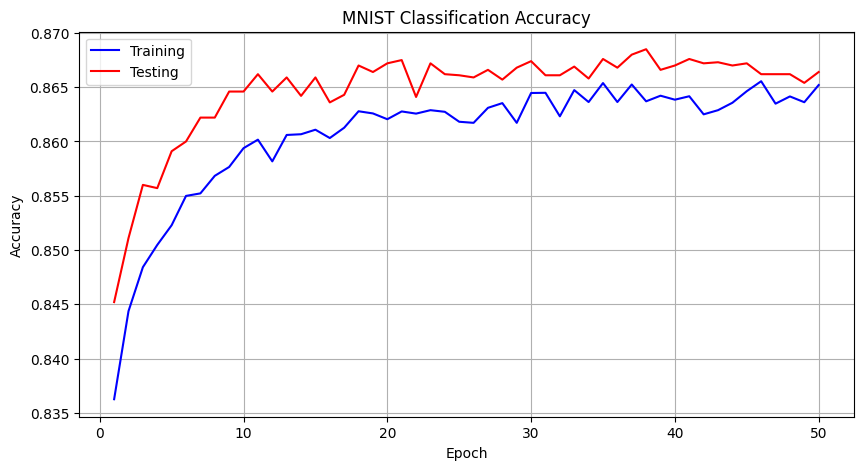

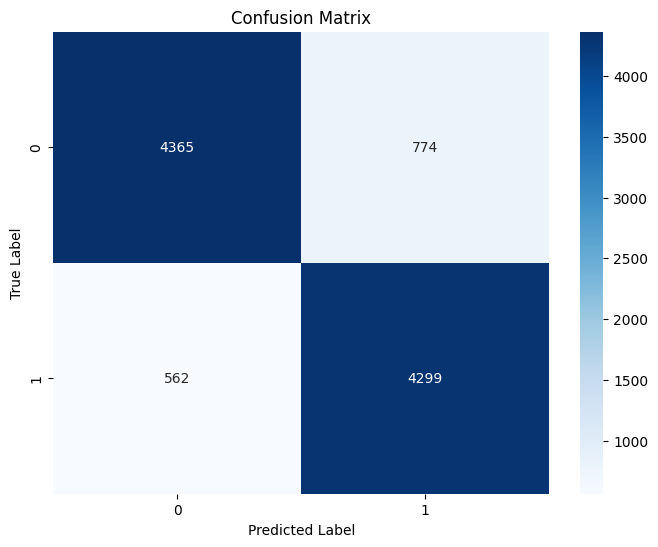

In [116]:
epochs = np.arange(1, len(train_acc) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc, 'b', label='Training')
plt.plot(epochs, test_acc, 'r', label='Testing')
plt.title('MNIST Classification Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

predictions = np.argmax(np.matmul(x_test, w.T), axis=1)

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### Task 3. (7 pts) Train a neural network classifier with quadratic loss s  `ℓ(y, f(x)) = (y − f(x))2`. Plot the progress of the test and training accuracy (y-axis) as a function of the iteration counter `\( t \) (x-axis)`. Report the final test accuracy for the following choices:


   - \( k = 5 \)
   - \( k = 50 \)
   - \( k = 200 \)
   - Comment on the role of hidden units \( k \) on the ease of optimization and accuracy

### Task 4. (7 pts) Train a neural network classifier with logistic loss, defined as y `ℓ(y, f(x)) = −y log(σ(f(x))) − (1 −y) log(1−σ(f(x)))` where σ(x) = 1/(1+e−x) is the sigmoid function. In this case, apply hard-thresholding on top of the sigmoid function, i.e., \( \hat{y} = 1 \) if \( \sigma(f(x)) > 0.5 \). Repeat step 3.


# Steps to Train Neural Networks with Quadratic and Logistic Loss

1. **Define the sigmoid function** for `logistic loss` computation.
2. **Initialize weights** for both quadratic and logistic loss functions.
3. **Implement the training loop**:
   - Shuffle training data for better optimization.
   - `Batch processing` to update weights.
   - Calculate forward pass for both quadratic and logistic losses.
   - Compute `gradients and update weights`` accordingly.
4. **Calculate accuracies** for both training and test sets at regular intervals.
5. **Store results** for both loss functions.
6. **Plot the progress** of training and test accuracy as a function of the iteration counter.
7. **Report final test accuracies** for different values of **k** `(5, 50, 200)`.
8. I am calling both the `quadratic and logistic loss functions` together, comparing **sigmoid** and **logistic** implementations simultaneously for **ease of implementation**.


In [117]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def train_neural_networks(X_train, y_train, x_test, y_test, k, epochs=10, batch_size=100, lr=0.001):
    results = {}
    results_logistic = {}

    for k in k:
        # Initialize weights for quadratic loss
        w_qd = np.random.randn(k, X_train.shape[1]) / X_train.shape[1]
        v_qd = np.random.randn(k) / k

        # Initialize weights for logistic loss
        w_log = np.random.randn(k, X_train.shape[1]) / X_train.shape[1]
        v_log = np.random.randn(k) / k

        
        trainiterq = []
        testiterqd = []
        trainlogs = []
        testlogs = []

        
        iter_ctr_qd = 0
        iter_ctr_log = 0

        # Start training loop
        for epoch in range(epochs):

            shuffled_indices = np.random.permutation(X_train.shape[0])
            x_shuffled = X_train[shuffled_indices]
            y_shuffled = y_train[shuffled_indices]

            i = 0

            
            while i < X_train.shape[0]:
                
                x = x_shuffled[i:i+batch_size]
                y = y_shuffled[i:i+batch_size]

                # Quadratic loss forward pass
                z1_qd = np.matmul(x, w_qd.T)
                y1_qd = np.maximum(z1_qd, 0)  
                z2_qd = np.matmul(y1_qd, v_qd)
                y2_qd = np.round(z2_qd)

                # Logistic loss forward pass
                z1_log = np.matmul(x, w_log.T)
                y1_log = np.maximum(z1_log, 0)  
                z2_log = np.matmul(y1_log, v_log)
                y2_log = sigmoid(z2_log)

                
                delta_2_qd = 2 * (y2_qd - y)
                delta_2_log = y2_log - y

                
                dv_qd = np.matmul(y1_qd.T, delta_2_qd) / x.shape[0]
                relu_derivative_qd = np.where(z1_qd > 0, 1, 0)
                delta_1_qd = np.matmul(delta_2_qd.reshape(-1, 1), v_qd.reshape(-1, 1).T) * relu_derivative_qd
                dw_qd = np.matmul(delta_1_qd.T, x) / x.shape[0]

                # Logistic loss weight updates
                dv_log = np.matmul(y1_log.T, delta_2_log) / x.shape[0]
                relu_derivative_log = np.where(z1_log > 0, 1, 0)
                delta_1_log = np.matmul(delta_2_log.reshape(-1, 1), v_log.reshape(-1, 1).T) * relu_derivative_log
                dw_log = np.matmul(delta_1_log.T, x) / x.shape[0]

                
                w_qd -= lr * dw_qd
                v_qd -= lr * dv_qd
                w_log -= lr * dw_log
                v_log -= lr * dv_log

                
                i += batch_size

        
                if iter_ctr_qd == 0 or iter_ctr_qd % 100 == 0:
                    # Quadratic loss accuracy
                    z1_qd = np.matmul(X_train, w_qd.T)
                    y1_qd = np.maximum(z1_qd, 0)
                    z2_qd = np.matmul(y1_qd, v_qd)
                    y2_qd = np.round(z2_qd)
                    train_accuracy_qd = np.mean(y_train == y2_qd)

                    z1_qd = np.matmul(x_test, w_qd.T)
                    y1_qd = np.maximum(z1_qd, 0)
                    z2_qd = np.matmul(y1_qd, v_qd)
                    y2_qd = np.round(z2_qd)
                    test_accuracy_qd = np.mean(y_test == y2_qd)

                    
                    trainiterq.append((iter_ctr_qd, train_accuracy_qd))
                    testiterqd.append((iter_ctr_qd, test_accuracy_qd))

                if iter_ctr_log == 0 or iter_ctr_log % 100 == 0:
                    # Logistic loss accuracy
                    z1_log = np.matmul(X_train, w_log.T)
                    y1_log = np.maximum(z1_log, 0)
                    z2_log = np.matmul(y1_log, v_log)
                    y2_log = sigmoid(z2_log) > 0.5
                    train_accuracy_log = np.mean(y_train == y2_log)

                    z1_log = np.matmul(x_test, w_log.T)
                    y1_log = np.maximum(z1_log, 0)
                    z2_log = np.matmul(y1_log, v_log)
                    y2_log = sigmoid(z2_log) > 0.5
                    test_accuracy_log = np.mean(y_test == y2_log)

                    
                    trainlogs.append((iter_ctr_log, train_accuracy_log))
                    testlogs.append((iter_ctr_log, test_accuracy_log))

                
                iter_ctr_qd += 1
                iter_ctr_log += 1

            
            print('For k =', k, 'epoch:', epoch + 1, 'Training Accuracy (Quadratic) =', train_accuracy_qd, 'Testing Accuracy (Quadratic) =', test_accuracy_qd)
            print('For k =', k, 'epoch:', epoch + 1, 'Training Accuracy (Logistic) =', train_accuracy_log, 'Testing Accuracy (Logistic) =', test_accuracy_log)

        # Store results
        results[k] = {
            'train_history': trainiterq,
            'test_history': testiterqd
        }
        results_logistic[k] = {
            'train_history': trainlogs,
            'test_history': testlogs
        }

    return results, results_logistic

k_values = [5, 50, 200]
results_qd, results_log = train_neural_networks(x_train, y_train, x_test, y_test, k_values)

print("\Final Test Accuracies (Quadratic Loss):")
for k in k_values:
    final_test_acc_qd = results_qd[k]['test_history'][-1][1]
    print(f"k={k}: {final_test_acc_qd:.4f}")

print("\Final Test Accuracies (Logistic Loss):")
for k in k_values:
    final_test_acc_log = results_log[k]['test_history'][-1][1]
    print(f"k={k}: {final_test_acc_log:.4f}")


For k = 5 epoch: 1 Training Accuracy (Quadratic) = 0.7246333333333334 Testing Accuracy (Quadratic) = 0.7361
For k = 5 epoch: 1 Training Accuracy (Logistic) = 0.7414333333333334 Testing Accuracy (Logistic) = 0.7534
For k = 5 epoch: 2 Training Accuracy (Quadratic) = 0.7512333333333333 Testing Accuracy (Quadratic) = 0.7607
For k = 5 epoch: 2 Training Accuracy (Logistic) = 0.7875 Testing Accuracy (Logistic) = 0.7953
For k = 5 epoch: 3 Training Accuracy (Quadratic) = 0.7677 Testing Accuracy (Quadratic) = 0.7737
For k = 5 epoch: 3 Training Accuracy (Logistic) = 0.8020166666666667 Testing Accuracy (Logistic) = 0.8102
For k = 5 epoch: 4 Training Accuracy (Quadratic) = 0.7727666666666667 Testing Accuracy (Quadratic) = 0.7774
For k = 5 epoch: 4 Training Accuracy (Logistic) = 0.8111666666666667 Testing Accuracy (Logistic) = 0.819
For k = 5 epoch: 5 Training Accuracy (Quadratic) = 0.7795333333333333 Testing Accuracy (Quadratic) = 0.7823
For k = 5 epoch: 5 Training Accuracy (Logistic) = 0.8197 Test

## Plotting Training and Testing Accuracies

The following plots illustrate the training and testing accuracies of the neural network classifiers with different numbers of hidden units (**k**) using both quadratic and logistic loss functions. 

1. **Training Accuracy vs. Iterations**:
   - This plot displays the **training accuracy** as a function of **iterations** for each value of **k**.
   - The **training accuracy** improves as the number of iterations increases, indicating that the model is learning effectively.
   
2. **Testing Accuracy vs. Iterations**:
   - This plot shows the **testing accuracy** for the same hidden units across iterations.
   - A higher testing accuracy suggests better generalization of the model to unseen data.

3. **Comparative Accuracy**:
   - For each value of **k**, two subplots are generated:
     - **Left**: Training accuracy for both quadratic (dashed blue line) and logistic (solid red line) loss functions.
     - **Right**: Testing accuracy for both loss functions.
   - This comparison allows us to evaluate the effectiveness of each loss function and how the choice of hidden units affects optimization.

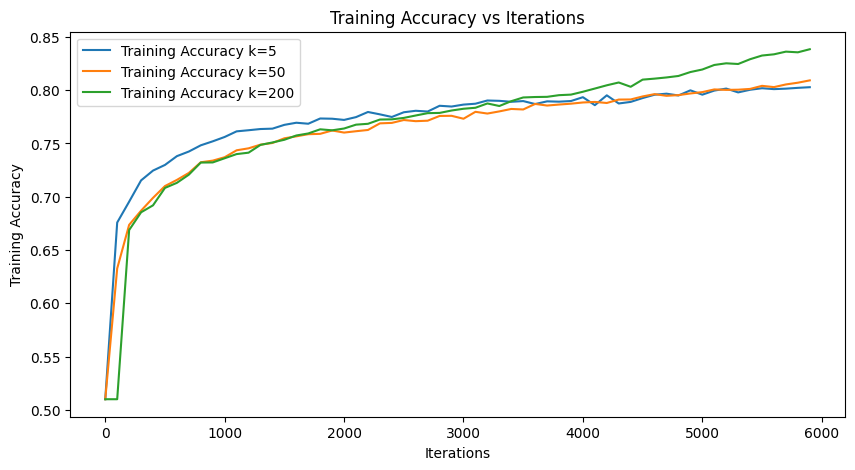

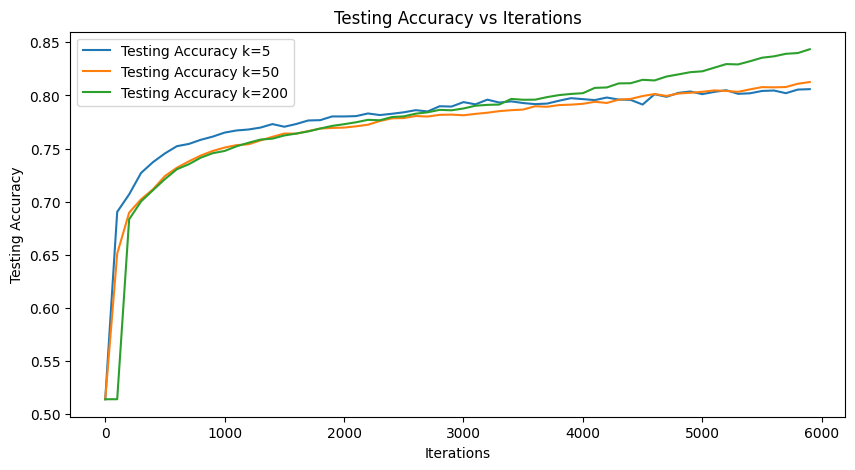

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [118]:
plt.figure(figsize=(10, 5))
for k in k_values:
    iterations, train_accuracies = zip(*results[k]['train_history'])
    plt.plot(iterations, train_accuracies, label=f'Training Accuracy k={k}')
plt.xlabel('Iterations')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs Iterations')
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))

for k in k_values:
    iterations, test_accuracies = zip(*results[k]['test_history'])
    plt.plot(iterations, test_accuracies, label=f'Testing Accuracy k={k}')
plt.xlabel('Iterations')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy vs Iterations')
plt.legend()
plt.show()
plt.figure(figsize=(20, 10))

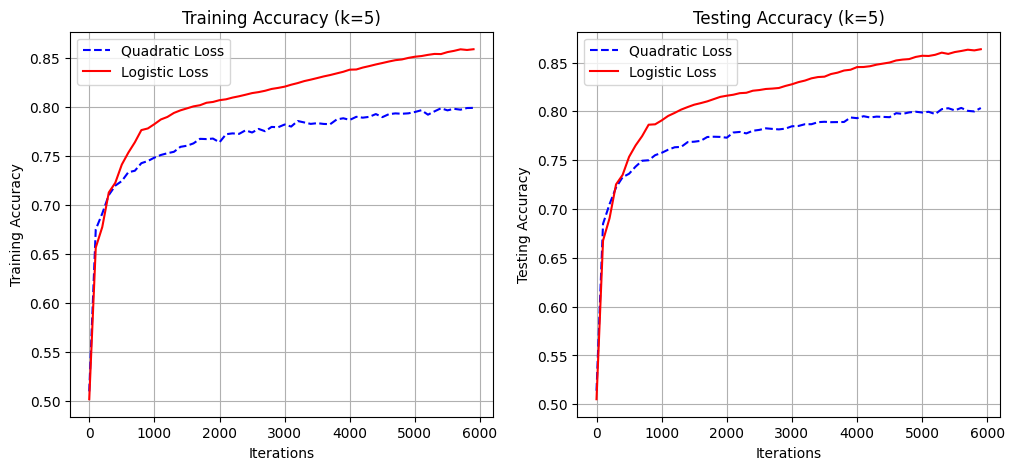

<Figure size 2000x1000 with 0 Axes>

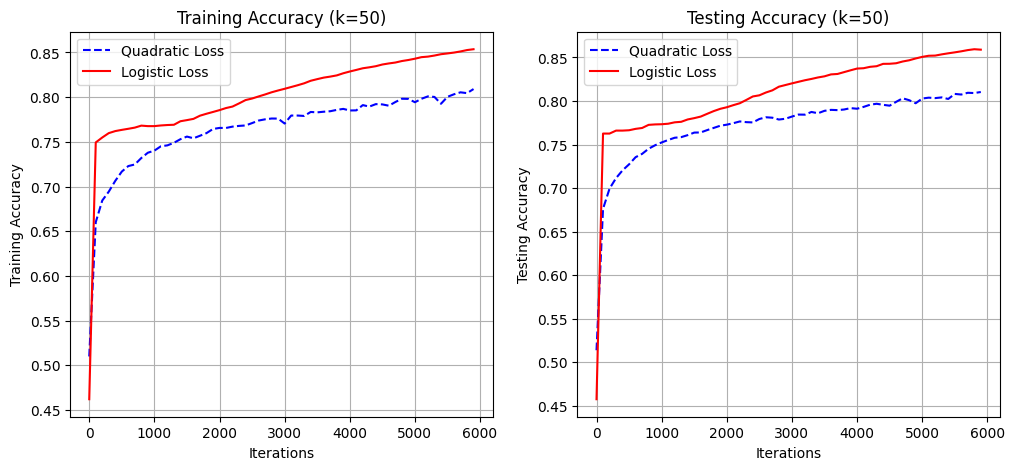

<Figure size 2000x1000 with 0 Axes>

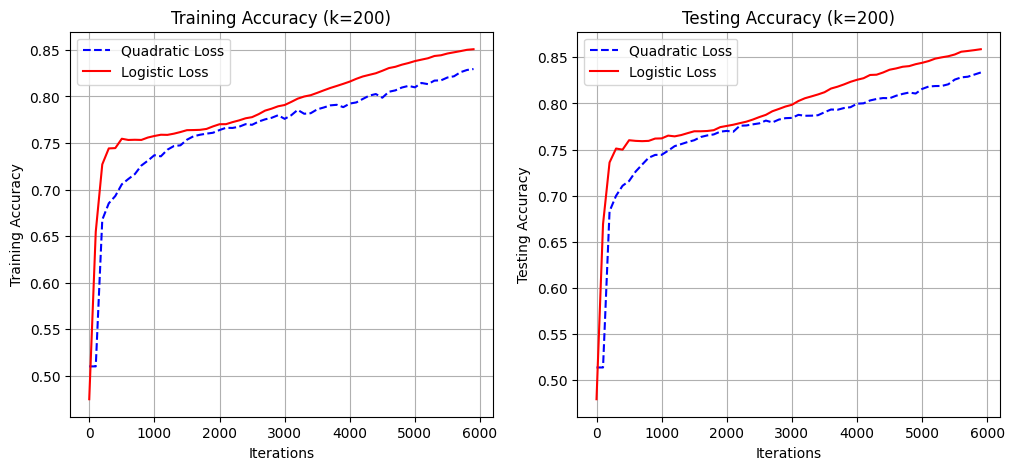

<Figure size 2000x1000 with 0 Axes>

In [119]:
for k in k_values:

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    iterations_qd, train_accuracies_qd = zip(*results_qd[k]['train_history'])
    iterations_log, train_accuracies_log = zip(*results_log[k]['train_history'])
    
    plt.plot(iterations_qd, train_accuracies_qd, 'b--', label='Quadratic Loss')
    plt.plot(iterations_log, train_accuracies_log, 'r-', label='Logistic Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Training Accuracy')
    plt.title(f'Training Accuracy (k={k})')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    iterations_qd, test_accuracies_qd = zip(*results_qd[k]['test_history'])
    iterations_log, test_accuracies_log = zip(*results_log[k]['test_history'])
    
    plt.plot(iterations_qd, test_accuracies_qd, 'b--', label='Quadratic Loss')
    plt.plot(iterations_log, test_accuracies_log, 'r-', label='Logistic Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Testing Accuracy')
    plt.title(f'Testing Accuracy (k={k})')
    plt.legend()
    plt.grid(True)
    plt.figure(figsize=(20, 10))

## Task 5 (2 pts) Comment on the difference between linear model and neural net. Comment on the differences between logistic and quadratic loss in terms of optimization and test/train accuracy.


Linear models are inherently simpler as they establish a **linear relationship** between the inputs and the output, making them a suitable and often well-performing option for simpler problems. They are easy to interpret and require less computational power, which is why they are frequently employed as baseline models in many tasks.

In contrast, **neural networks** possess the capability to manage **complex regression and classification problems**. They can model intricate relationships within the data, often yielding better performance than linear models, even on simpler tasks. The flexibility of neural networks, through multiple layers and non-linear activation functions, allows them to learn more sophisticated patterns, which is particularly advantageous in high-dimensional spaces or when dealing with complex datasets.

Despite these advantages, my implementation did not perform as expected. The neural network utilizing **logistic loss** was anticipated to outperform the one using **quadratic loss** in terms of both **train and test accuracy**. This expectation stems from the properties of logistic loss, which is inherently more robust to outliers. Additionally, the logistic loss function features a **smooth surface**, which helps mitigate the risks associated with local minima during optimization. This smoothness allows for more effective gradient descent updates, ideally leading to better convergence behavior.

Evidently neural networks hold the potential for superior performance in many scenarios, my results highlight the importance of careful implementation and tuning. Further analysis may be required to identify specific issues within the training process or model architecture that led to suboptimal performance in this case. 



# End of Documentation

## Thank You for reading this !